# Importing Libraries & File

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib
import seaborn as sns
sns.set()

Using matplotlib backend: module://matplotlib_inline.backend_inline


In [2]:
df= pd.read_csv(r"C:\Users\hp\Desktop\python\Sales and Marketing Call Center.csv")

## Getting To Know Data

In [3]:
df.describe()

,Date,Agent_Rating,Call_Duration_Minutes,Customer_Age
count,200000.000000,155356.000000,155356.000000,200000.000000
mean,45474.407020,4.254643,16.910975,26.316825
std,105.667972,0.923115,12.634362,10.467033
min,45292.000000,0.000000,2.000000,14.000000
25%,45383.000000,4.000000,6.600000,16.000000
50%,45475.000000,4.600000,12.240000,25.000000
75%,45566.000000,4.800000,26.200000,35.000000
max,45657.000000,5.000000,45.000000,69.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Call_ID                  200000 non-null  object 
 1   Date                     200000 non-null  int64  
 2   Agent_First_Name         200000 non-null  object 
 3   Agent_Last_Name          200000 non-null  object 
 4   Agent_Rating             155356 non-null  float64
 5   Product_Discussed        155356 non-null  object 
 6   Call_Duration_Minutes    155356 non-null  float64
 7   Call_Outcome             200000 non-null  object 
 8   Customer_Age             200000 non-null  int64  
 9   Callers_Name             200000 non-null  object 
 10  Customer_Gender          200000 non-null  object 
 11  State                    200000 non-null  object 
 12  Customer_Income_Bracket  200000 non-null  object 
 13  Time_of_Day              200000 non-null  object 
 14  Foll

In [5]:
df.isna().sum()

Call_ID                        0
Date                           0
Agent_First_Name               0
Agent_Last_Name                0
Agent_Rating               44644
Product_Discussed          44644
Call_Duration_Minutes      44644
Call_Outcome                   0
Customer_Age                   0
Callers_Name                   0
Customer_Gender                0
State                          0
Customer_Income_Bracket        0
Time_of_Day                    0
Follow_Up_Call_Required        0
Repeat_Customer                0
Reason_Call_Abandoned      83519
dtype: int64

# Handling Missing And Inconsistent Data Before Analysis

In [6]:
df= df.drop(columns=['Date'])

In [7]:
df['Agent_Rating']= df['Agent_Rating'].fillna(df['Agent_Rating'].median())

In [8]:
df['Call_Duration_Minutes']= df['Call_Duration_Minutes'].fillna(df['Call_Duration_Minutes'].median())

In [9]:
df['Reason_Call_Abandoned']= df['Reason_Call_Abandoned'].fillna('Not_Abandoned')

In [10]:
table= pd.crosstab(df['Reason_Call_Abandoned'],
                      df['Call_Outcome'],
                      normalize= 'index')*100
table.round(2)

Call_Outcome,Abandoned,Failure,Success
Reason_Call_Abandoned,,,
Agent Not Available,38.66,61.34,0.0
Customer Hung Up,36.62,63.38,0.0
Long Wait Time,39.34,60.66,0.0
Not_Abandoned,0.00,0.00,100.0
Technical Issues,1.22,98.78,0.0
long Wait Time,100.00,0.00,0.0


In [11]:
df['Product_Discussed']= df['Product_Discussed'].fillna('Not_Discussed')

In [12]:
df['Call_Outcome'].describe()


count      200000
unique          3
top       Success
freq        83519
Name: Call_Outcome, dtype: object

In [13]:
df['Call_Outcome'].unique()


array(['Success', 'Failure', 'Abandoned'], dtype=object)

In [14]:
df.describe()

,Agent_Rating,Call_Duration_Minutes,Customer_Age
count,200000.000000,200000.000000,200000.000000
mean,4.331733,15.868320,26.316825
std,0.826200,11.303897,10.467033
min,0.000000,2.000000,14.000000
25%,4.500000,8.497500,16.000000
50%,4.600000,12.240000,25.000000
75%,4.800000,21.990000,35.000000
max,5.000000,45.000000,69.000000


In [15]:
df.insert(
    loc= df.columns.get_loc('Call_ID')+1,
    column= 'Full_Name',
    value= df['Agent_First_Name']+ ' '+ df['Agent_Last_Name']  )

In [16]:
df['Full_Name']= df['Full_Name'].str.strip().str.title()

In [17]:
df= df.drop(columns=['Agent_First_Name', 'Agent_Last_Name'])

In [18]:
df['Reason_Call_Abandoned']= ( df['Reason_Call_Abandoned']
.str.strip()
.str.title() )

In [19]:
df['Customer_Age'].unique()

array([25, 20, 40, 35, 50, 47, 69, 31, 29, 43, 33, 15, 45, 30, 14, 62, 26,
       16, 51, 39, 24, 54, 65, 58, 37, 64, 52, 23, 61, 57, 36, 63, 19, 60,
       56, 41, 27, 42, 32, 34, 66, 59, 68, 53, 55, 38, 48, 21, 22, 28])

In [20]:
df['Customer_Age'].describe()

count    200000.000000
mean         26.316825
std          10.467033
min          14.000000
25%          16.000000
50%          25.000000
75%          35.000000
max          69.000000
Name: Customer_Age, dtype: float64

In [21]:
df['Call_Duration_Minutes'].describe()

count    200000.000000
mean         15.868320
std          11.303897
min           2.000000
25%           8.497500
50%          12.240000
75%          21.990000
max          45.000000
Name: Call_Duration_Minutes, dtype: float64

## Converting Text data To Numerical Data To Facilitate Analysis

In [22]:
df['Repeat_Customer'].unique()

array(['No', 'Yes'], dtype=object)

In [23]:
df['Follow_Up_Call_Required'].unique()

array(['Yes', 'No'], dtype=object)

In [24]:
yn_cols= ['Repeat_Customer', 'Follow_Up_Call_Required']
df[yn_cols]= df[yn_cols].replace({'Yes': 1, 'No': 0}) 

C:\Users\hp\AppData\Local\Temp\ipykernel_19492\4273526950.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[yn_cols]= df[yn_cols].replace({'Yes': 1, 'No': 0})


In [25]:
df.head()

,Call_ID,Full_Name,Agent_Rating,Product_Discussed,Call_Duration_Minutes,Call_Outcome,Customer_Age,Callers_Name,Customer_Gender,State,Customer_Income_Bracket,Time_of_Day,Follow_Up_Call_Required,Repeat_Customer,Reason_Call_Abandoned
0,el-Pa,Michael Page,5.0,Loans,10.00,Success,25,Noah Smith,Male,New York,High,Afternoon,1,0,Not_Abandoned
1,ah-Ha,Elijah Hawkins,4.9,Internet Package,26.22,Failure,20,Brian Anderson,Male,California,High,Morning,0,1,Technical Issues
2,ia-Ly,Olivia Lyons,5.0,Loans,10.00,Success,40,Loretta Williams,Female,Alabama,Low,Morning,0,0,Not_Abandoned
3,ew-Cl,Drew Clay,4.4,Loans,2.00,Failure,20,Casey Reyes,Male,New York,High,Morning,0,0,Technical Issues
4,va-Sa,Ava Sandoval,5.0,Loans,2.00,Failure,35,Craig Mosley,Male,North Carolina,Low,Afternoon,1,1,Technical Issues


## Grouping Data Into Categories To Facilitate Analysis

In [26]:
df['Call_length']= pd.cut(
    df['Call_Duration_Minutes'],
    bins= [0,5,15,30,45],
    labels= ['short','medium','long','very long']  )

In [27]:
df['Age_Group']= pd.cut(
    df['Customer_Age'],
    bins= [13,24,34,44,54,100],
    labels= ['18-24','25-34','35-44','45-54','55+']  )

## Columns Arrangment

In [28]:
ordered_cols= ['Call_ID', 'Full_Name', 'Agent_Rating', 'Product_Discussed',
    'Call_Duration_Minutes', 'Call_length', 'Call_Outcome',
    'Customer_Age', 'Age_Group', 'Customer_Gender', 'State',
    'Customer_Income_Bracket', 'Time_of_Day',
    'Follow_Up_Call_Required', 'Repeat_Customer',
    'Reason_Call_Abandoned']

df = df[ordered_cols]

In [29]:
df.to_csv('call_center_cleaned')

## What are the main reasons for call abandonment?


In [30]:
df[df['Product_Discussed'] == 'Not_Discussed'][['Call_Outcome', 'Reason_Call_Abandoned']].value_counts()

Call_Outcome  Reason_Call_Abandoned
Abandoned     Long Wait Time           42160
              Agent Not Available        840
              Technical Issues           835
              Customer Hung Up           809
Name: count, dtype: int64

In [31]:
df[df['Call_Outcome']=='Abandoned']['Call_length'].value_counts()

Call_length
medium       44644
short            0
long             0
very long        0
Name: count, dtype: int64

## Which Product Discussed has the highest Failure rate?

In [32]:
df['Call_Outcome'].unique()

array(['Success', 'Failure', 'Abandoned'], dtype=object)

In [33]:
df[df['Call_Outcome']=='Failure']['Product_Discussed'].value_counts()

Product_Discussed
Internet Package    23277
Loans               23088
Electronics         11954
Travel Package       9961
Insurance            3557
Name: count, dtype: int64

## Which Product Discussed need Follow_Up ?

In [34]:
df[df['Follow_Up_Call_Required']==1]['Product_Discussed'].value_counts()

Product_Discussed
Internet Package    35082
Loans               35020
Not_Discussed       31204
Electronics         18045
Travel Package      15243
Insurance            5386
Name: count, dtype: int64

## Which repeat customers require more follow-up calls?

In [45]:
follow_up = df.groupby('Repeat_Customer')['Follow_Up_Call_Required'].sum()
follow_up

Repeat_Customer
0    104840
1     35140
Name: Follow_Up_Call_Required, dtype: int64

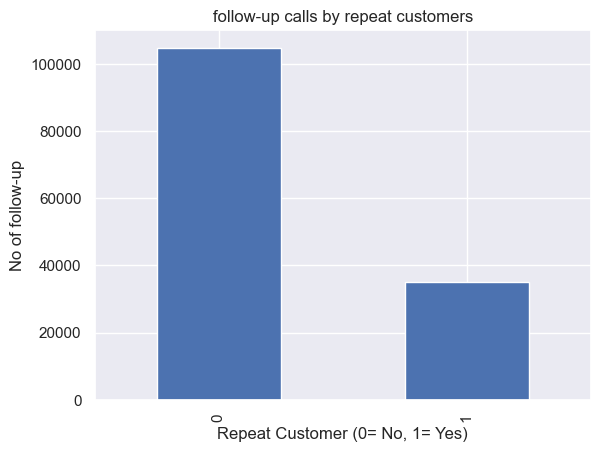

In [50]:
follow_up.plot(kind= 'bar')
plt.title('follow-up calls by repeat customers')
plt.xlabel('Repeat Customer (0= No, 1= Yes)')
plt.ylabel('No of follow-up')
plt.show()

## Is there a relationship between Call_Outcome & Time_of_Day ?

In [39]:
df[df['Call_Outcome']=='Abandoned']['Time_of_Day'].value_counts()

Time_of_Day
Afternoon    21361
Morning      17854
Evening       5429
Name: count, dtype: int64